In [87]:
#Disable warnings
import warnings
warnings.filterwarnings("ignore")

## Loading data

In [88]:
# Load libraries
import sklearn
import joblib

# Get scikit-learn version
scikit_version = sklearn.__version__

# Load the model
pipe = joblib.load("models/model_{version}.pkl".format(version=scikit_version))

# Save the model as pickle file for the web app
joblib.dump(pipe, "web/models/model_{version}.pkl".format(version=scikit_version))

# Load the model
model = joblib.load("models/model_lgbm.pkl")

# Save the model as pickle file for the web app
joblib.dump(model, "web/models/model_lgbm.pkl")
# display the model
pipe

Pipeline(steps=[('preprocess', Pipeline(steps=[('scale', StandardScaler())])),
                ('model',
                 RandomForestClassifier(criterion='entropy', max_depth=9,
                                        max_features=14, n_estimators=29))])

In [89]:
model

RandomizedSearchCV(cv=3,
                   estimator=LGBMClassifier(metric='None', n_estimators=200,
                                            random_state=13,
                                            scale_pos_weight=11.387150050352467,
                                            silent=True),
                   n_jobs=-1,
                   param_distributions={'colsample_bytree': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002764FC4D730>,
                                        'min_child_samples': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002764FC4D310>,
                                        'min_child_weight': [1e-05, 0.01, 1,
                                                             100.0, 10000.0],
                                        'num_leaves': array([10, 21, 33, 45, 56, 68, 80]),
                                        'reg_alpha': [0.1, 1, 10, 100],
                                        'reg_lambda': [0.1, 1, 10, 50, 100],


# Preparation of data

In [90]:
# load libraries
import pandas as pd

data_train_featured = pd.read_csv('data_p7/cleaned/data_train_featured.csv', index_col='SK_ID_CURR')
print('Featured training data set shape: ', data_train_featured.shape)
data_train_featured.head()

Featured training data set shape:  (307511, 40)


,EXT_SOURCE_2,DAYS_BIRTH,AMT_CREDIT,AMT_ANNUITY,DAYS_EMPLOYED,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE,DAYS_REGISTRATION,REGION_POPULATION_RELATIVE,AMT_INCOME_TOTAL,...,ORGANIZATION_TYPE_Military,OCCUPATION_TYPE_Laborers,FLAG_DOCUMENT_16,ORGANIZATION_TYPE_Industrytype9,ORGANIZATION_TYPE_BusinessEntityType3,WALLSMATERIAL_MODE_Panel,ORGANIZATION_TYPE_Transporttype3,CODE_GENDER_M,OCCUPATION_TYPE_Highskilltechstaff,TARGET
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100002,0.262949,-9461,406597.5,24700.5,-637,-2120,-1134.0,-3648.0,0.018801,202500.0,...,0,1,0,0,1,0,0,1,0,1
100003,0.622246,-16765,1293502.5,35698.5,-1188,-291,-828.0,-1186.0,0.003541,270000.0,...,0,0,0,0,0,0,0,0,0,0
100004,0.555912,-19046,135000.0,6750.0,-225,-2531,-815.0,-4260.0,0.010032,67500.0,...,0,1,0,0,0,0,0,1,0,0
100006,0.650442,-19005,312682.5,29686.5,-3039,-2437,-617.0,-9833.0,0.008019,135000.0,...,0,1,0,0,1,0,0,0,0,0
100007,0.322738,-19932,513000.0,21865.5,-3038,-3458,-1106.0,-4311.0,0.028663,121500.0,...,0,0,0,0,0,0,0,1,0,0


In [91]:
from sklearn.impute import SimpleImputer

# Split features and targets
target_train = data_train_featured['TARGET']
data_train_featured = data_train_featured.drop(columns='TARGET')
feature_names = data_train_featured.columns
index = data_train_featured.index

# Imputations
imp_mean = SimpleImputer(strategy='mean')
imp_mean.fit(data_train_featured)
data_train_featured = pd.DataFrame(
    imp_mean.transform(data_train_featured),
    columns=feature_names,
    index=index
)

In [92]:
# Get the predictions of the model (for positive class: default)
y_train_pred = pipe.predict_proba(data_train_featured)[:,1]
y_train_pred = pd.Series(
    y_train_pred,
    index=data_train_featured.index,
)

# Save the predictions
y_train_pred.to_csv(
    'data_p7/cleaned/target_train_predictions.csv',
    header='TARGET')

In [93]:
# Get the predictions of the model (for positive class: default)
y_train_pred_lgbm = model.predict_proba(data_train_featured)[:,1]
y_train_pred_lgbm = pd.Series(
    y_train_pred_lgbm,
    index=data_train_featured.index,
)

# Save the predictions
y_train_pred_lgbm.to_csv(
    'data_p7/cleaned/target_train_predictions_lgbm.csv',
    header='TARGET')

## Sampling for web app

In [94]:
# Sampling
data_processed = data_train_featured.sample(n=5000, random_state=42)

# Save the sample for web app
data_processed.to_csv('web/data/data_processed.csv')

# Display
data_processed

,EXT_SOURCE_2,DAYS_BIRTH,AMT_CREDIT,AMT_ANNUITY,DAYS_EMPLOYED,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE,DAYS_REGISTRATION,REGION_POPULATION_RELATIVE,AMT_INCOME_TOTAL,...,OCCUPATION_TYPE_Drivers,ORGANIZATION_TYPE_Military,OCCUPATION_TYPE_Laborers,FLAG_DOCUMENT_16,ORGANIZATION_TYPE_Industrytype9,ORGANIZATION_TYPE_BusinessEntityType3,WALLSMATERIAL_MODE_Panel,ORGANIZATION_TYPE_Transporttype3,CODE_GENDER_M,OCCUPATION_TYPE_Highskilltechstaff
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
384575,0.604894,-13297.0,465457.5,52641.0,-762.0,-4307.0,-2.0,-637.0,0.009630,207000.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
214010,0.425351,-14778.0,1281712.5,48946.5,-1141.0,-4546.0,-1071.0,-1610.0,0.006852,247500.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
142232,0.531760,-17907.0,495000.0,39109.5,-639.0,-1461.0,-1435.0,-2507.0,0.035792,202500.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
389171,0.693521,-19626.0,254700.0,24939.0,-6982.0,-3158.0,-2000.0,-11167.0,0.046220,247500.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
283617,0.560690,-20327.0,308133.0,15862.5,-1105.0,-494.0,-173.0,-7299.0,0.018850,112500.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200560,0.530584,-11537.0,254700.0,27153.0,-664.0,-1623.0,-751.0,-2653.0,0.018029,135000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
244334,0.713252,-24998.0,254700.0,25191.0,-738.0,-3947.0,0.0,-11288.0,0.022625,85500.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
432795,0.020676,-11111.0,417024.0,32877.0,-1312.0,-3658.0,-283.0,-5193.0,0.010032,135000.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


# Preparation of initial data

In [95]:
import pandas as pd

data_train_original = pd.read_csv('data_p7/input/application_train.csv', index_col='SK_ID_CURR')
print('Original training set (application_set) shape: ', data_train_original.shape)

Original training set (application_set) shape:  (307511, 121)


In [96]:
mask = data_train_original.index.isin(data_train_featured.index)

# Keep only points that are in the engineered set
data_train_original = data_train_original[mask]

# Drop target column
data_train_original = data_train_original.drop(columns='TARGET')

In [97]:
# Sampling
data_original = data_train_original.sample(n=5000, random_state=42)

# Save the sample for web app
data_original.to_csv('web/data/data_original.csv')

# Display
data_original

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
384575,Cash loans,M,Y,N,2,207000.0,465457.5,52641.0,418500.0,Unaccompanied,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0
214010,Cash loans,F,Y,Y,0,247500.0,1281712.5,48946.5,1179000.0,Unaccompanied,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,3.0
142232,Cash loans,F,Y,N,0,202500.0,495000.0,39109.5,495000.0,Unaccompanied,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,3.0
389171,Cash loans,F,N,Y,0,247500.0,254700.0,24939.0,225000.0,Unaccompanied,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
283617,Cash loans,M,N,Y,0,112500.0,308133.0,15862.5,234000.0,Unaccompanied,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200560,Cash loans,F,N,Y,0,135000.0,254700.0,27153.0,225000.0,Unaccompanied,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
244334,Cash loans,F,N,Y,0,85500.0,254700.0,25191.0,225000.0,Unaccompanied,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
432795,Cash loans,M,N,N,0,135000.0,417024.0,32877.0,360000.0,Unaccompanied,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [98]:
from sklearn.impute import SimpleImputer

# Imputation of missing values for numerical features
numerical_features = list(data_train_original.select_dtypes(include='number').columns)
data_train_original[numerical_features] = SimpleImputer(strategy='mean').fit_transform(data_train_original[numerical_features])

# Imputation of missing values for categorical features
categorical_features = list(data_train_original.select_dtypes(include='object').columns)
data_train_original[categorical_features] = SimpleImputer(strategy='constant', fill_value='missing').fit_transform(data_train_original[categorical_features])

# Display results
print("Remaining missing values:", data_train_original.isna().any().any())

Remaining missing values: False


### Categorial data encoding

In [99]:
def OneHotEncode(myData):
    from numpy import array
    from sklearn.preprocessing import OneHotEncoder
    # make a 2D array
    myData = myData.values.reshape(len(myData), 1) 
    # set up the OneHotEncoder
    enc = OneHotEncoder(sparse=False)
    # One hot Encode the data
    myData = enc.fit_transform(myData)
    #display(myData.shape)
    #display(myData)
    return myData

In [100]:
# label encoding of each categorical feature
categorical_names = {} # dictionnary of modalities for each cat. feature
label_encoders = {} # dictionnary of encoders for each cat. feature
for feature in categorical_features:
    le = sklearn.preprocessing.LabelEncoder()
    data_train_original.loc[:, feature] = le.fit_transform(data_train_original.loc[:, feature])
    categorical_names[feature] = le.classes_
    label_encoders[feature] = le
for feature in categorical_features:
    data_train_original[feature] = OneHotEncode(data_train_original[feature])
# Save the processed original data
data_train_original.to_csv('data_p7/cleaned/data_train_original.csv')

In [101]:
# Sampling
data_original_le = data_train_original.sample(n=5000, random_state=42)

# Save the sample for web app
data_original_le.to_csv('web/data/data_original_le.csv')

# Display
data_original_le

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
384575,1.0,0.0,0.0,1.0,2.0,207000.0,465457.5,52641.0,418500.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000,0.000000,1.000000,0.000000,1.000000
214010,1.0,1.0,0.0,0.0,0.0,247500.0,1281712.5,48946.5,1179000.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000,0.000000,1.000000,0.000000,3.000000
142232,1.0,1.0,0.0,1.0,0.0,202500.0,495000.0,39109.5,495000.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000,0.000000,1.000000,0.000000,3.000000
389171,1.0,1.0,1.0,0.0,0.0,247500.0,254700.0,24939.0,225000.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000,0.000000,0.000000,0.000000,0.000000
283617,1.0,0.0,1.0,0.0,0.0,112500.0,308133.0,15862.5,234000.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000,0.000000,0.000000,0.000000,4.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200560,1.0,1.0,1.0,0.0,0.0,135000.0,254700.0,27153.0,225000.0,0.0,...,0.0,0.0,0.0,0.0,0.006402,0.007,0.034362,0.267395,0.265474,1.899974
244334,1.0,1.0,1.0,0.0,0.0,85500.0,254700.0,25191.0,225000.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000,0.000000,0.000000,0.000000,0.000000
432795,1.0,0.0,1.0,1.0,0.0,135000.0,417024.0,32877.0,360000.0,0.0,...,0.0,0.0,0.0,0.0,0.006402,0.007,0.034362,0.267395,0.265474,1.899974


# Surrogate model

## Global interpretation

Random forest / decision tree surrogate

In [102]:
from sklearn.tree import DecisionTreeRegressor

# Instanciate a surrogate model without depth limit to overfit
sur_dt = DecisionTreeRegressor()

# Over-fitting the surrogate model on original features
sur_dt_fitted = sur_dt.fit(data_train_original, y_train_pred)

In [103]:
# Get scikit-learn version
scikit_version = sklearn.__version__

# Save the model as pickle file
joblib.dump(sur_dt, "web/models/surrogate_model_{version}.pkl".format(version=scikit_version))

['web/models/surrogate_model_0.24.2.pkl']

In [104]:
print("Main features per importance:")
# 'feature_importances_' to get feature rank by importance from decision tree 
sum_val = 0
for col, val in sorted(zip(data_train_original.columns, sur_dt.feature_importances_,), 
                       key=lambda x: x[1], reverse=True,)[:10]:
    print(f"{col:28}{val:10.3f}")
    sum_val += val
    
print("Percentage of the model explained by the 10 first features:", sum_val*100)

Main features per importance:
EXT_SOURCE_2                     0.646
DAYS_BIRTH                       0.115
DAYS_EMPLOYED                    0.065
CODE_GENDER                      0.040
DAYS_ID_PUBLISH                  0.018
AMT_ANNUITY                      0.013
FLAG_DOCUMENT_3                  0.012
AMT_CREDIT                       0.012
DAYS_LAST_PHONE_CHANGE           0.009
AMT_GOODS_PRICE                  0.007
Percentage of the model explained by the 10 first features: 93.70987621858902


LGBM / decision tree surrogate

In [105]:

from sklearn.tree import DecisionTreeRegressor

# Instanciate a surrogate model without depth limit to overfit
sur_dt_lgbm = DecisionTreeRegressor()

# Over-fitting the surrogate model on original features
sur_dt_lgbm_fitted = sur_dt_lgbm.fit(data_train_original, y_train_pred_lgbm)

In [106]:
# Get scikit-learn version
scikit_version = sklearn.__version__

# Save the model as pickle file
joblib.dump(sur_dt_lgbm, "web/models/surrogate_model_lgbm.pkl".format(version=scikit_version))

['web/models/surrogate_model_lgbm.pkl']

In [107]:
print("Main features per importance:")
# 'feature_importances_' to get feature rank by importance from decision tree 
sum_val = 0
for col, val in sorted(zip(data_train_original.columns, sur_dt_lgbm.feature_importances_,), 
                       key=lambda x: x[1], reverse=True,)[:10]:
    print(f"{col:28}{val:10.3f}")
    sum_val += val
    
print("Percentage of the model explained by the 10 first features:", sum_val*100)

Main features per importance:
EXT_SOURCE_2                     0.464
DAYS_BIRTH                       0.084
DAYS_EMPLOYED                    0.070
AMT_CREDIT                       0.045
CODE_GENDER                      0.041
DAYS_ID_PUBLISH                  0.035
AMT_ANNUITY                      0.030
AMT_GOODS_PRICE                  0.027
DAYS_LAST_PHONE_CHANGE           0.023
FLAG_DOCUMENT_3                  0.019
Percentage of the model explained by the 10 first features: 83.80570458536592


The feature importance is similar between surrogate on random forest and LGBM, the ranking slightly changes

## Local interpretation

Random forest / decision tree surrogate

In [108]:
SK_ID_CURR = 100002
application_data = data_train_original.loc[SK_ID_CURR:SK_ID_CURR]

print("Application ID:", SK_ID_CURR)
print("Predicted value:", y_train_pred.loc[SK_ID_CURR])

Application ID: 100002
Predicted value: 0.21812550272297


In [109]:
#pip install treeinterpreter
from treeinterpreter import treeinterpreter as ti

# Computation of the prediction, bias and contribs from surrogate model
prediction, bias, contribs = ti.predict(sur_dt, application_data)

print("Prediction:", prediction)

print("Bias (trainset mean):", bias)

print("Main features contributions:")
for contrib, feature in sorted(zip(contribs[0], data_train_original.columns), key=lambda x: abs(x[0]), reverse=True,):
    if contrib != 0:
        print("   {:32}{}".format(feature, contrib))

Prediction: [[0.2181255]]
Bias (trainset mean): [0.08051243]
Main features contributions:
   EXT_SOURCE_2                    0.04308616309441919
   EXT_SOURCE_1                    0.019602830634660506
   DAYS_BIRTH                      0.016222760460792768
   CODE_GENDER                     0.015547048927276874
   DAYS_EMPLOYED                   0.014569720463929847
   CNT_FAM_MEMBERS                 0.007726495068204026
   FLAG_DOCUMENT_3                 0.007615911853242868
   AMT_ANNUITY                     0.0064981455191625015
   AMT_CREDIT                      0.006096781089226511
   DAYS_REGISTRATION               -0.004323074469553628
   AMT_GOODS_PRICE                 -0.004096768137380746
   DAYS_LAST_PHONE_CHANGE          0.002918987477067009
   OWN_CAR_AGE                     0.0025900204709417562
   AMT_INCOME_TOTAL                0.001521164606634845
   YEARS_BUILD_MODE                0.0010214562692596185
   NONLIVINGAREA_MODE              0.0007339801378315469
   AMT_RE

LGBM / decision tree surrogate

In [110]:
SK_ID_CURR = 100002
application_data_lgbm = data_train_original.loc[SK_ID_CURR:SK_ID_CURR]

print("Application ID:", SK_ID_CURR)
print("Predicted value:", y_train_pred_lgbm.loc[SK_ID_CURR])

Application ID: 100002
Predicted value: 0.7620648089177725


In [111]:
#pip install treeinterpreter
from treeinterpreter import treeinterpreter as ti

# Computation of the prediction, bias and contribs from surrogate model
prediction, bias, contribs = ti.predict(sur_dt_lgbm, application_data_lgbm)

print("Prediction:", prediction)

print("Bias (trainset mean):", bias)

print("Main features contributions:")
for contrib, feature in sorted(zip(contribs[0], data_train_original.columns), key=lambda x: abs(x[0]), reverse=True,):
    if contrib != 0:
        print("   {:32}{}".format(feature, contrib))

Prediction: [[0.76206481]]
Bias (trainset mean): [0.42107055]
Main features contributions:
   EXT_SOURCE_2                    0.17139756573728715
   DAYS_LAST_PHONE_CHANGE          -0.05938537087394069
   DAYS_EMPLOYED                   0.05710045331630953
   DEF_30_CNT_SOCIAL_CIRCLE        0.04862321177508366
   CODE_GENDER                     0.03699711083780932
   FLAG_DOCUMENT_3                 0.024747011181197043
   AMT_CREDIT                      0.017950584313873974
   AMT_GOODS_PRICE                 0.016834493543317897
   AMT_REQ_CREDIT_BUREAU_YEAR      0.009506661447305054
   DAYS_BIRTH                      0.007593716260892003
   OWN_CAR_AGE                     0.006883164557479504
   EXT_SOURCE_3                    0.002745653535684567


## SHAP model interpretation

In [112]:
#!pip install probatus

In [84]:
from probatus.interpret import ShapModelInterpreter
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [30]:
data_train_original.isnull().values.any()

False

In [31]:
feature_names = data_train_original.columns
index = data_train_original.index

In [32]:
imp_mean = SimpleImputer(strategy='mean')
imp_mean.fit(data_train_original)

SimpleImputer()

In [33]:
data_train_original_shap = pd.DataFrame(
    imp_mean.transform(data_train_original),
    columns=feature_names,
    index=index
)

In [34]:


# Prepare two samples
X, y = make_classification(n_samples=307511,n_features =4, random_state=0)
X = pd.DataFrame(data_train_original_shap, columns=feature_names)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Prepare and fit model. Remember about class_weight="balanced" or an equivalent.
clf = RandomForestClassifier(n_estimators = 100, max_depth=2, random_state=0)
clf = clf.fit(X_train, y_train)

In [35]:
shap_interpreter = ShapModelInterpreter(clf)
feature_importance = shap_interpreter.fit_compute(X_train, X_test, y_train, y_test, approximate=False)
feature_importance

 99%|===================| 122004/123006 [01:04<00:00]        

,mean_abs_shap_value_test,mean_abs_shap_value_train,mean_shap_value_test,mean_shap_value_train
DAYS_BIRTH,0.000391,0.000383,-0.000033,-0.000032
NONLIVINGAREA_AVG,0.000265,0.000253,0.000014,-0.000014
DAYS_EMPLOYED,0.000227,0.000204,0.000036,0.000004
DAYS_ID_PUBLISH,0.000184,0.000178,-0.000033,0.000017
NONLIVINGAREA_MEDI,0.000167,0.000180,0.000043,-0.000002
...,...,...,...,...
FLAG_DOCUMENT_4,0.000000,0.000000,0.000000,0.000000
FLAG_DOCUMENT_17,0.000000,0.000000,0.000000,0.000000
COMMONAREA_MODE,0.000000,0.000000,0.000000,0.000000
REG_REGION_NOT_LIVE_REGION,0.000000,0.000000,0.000000,0.000000


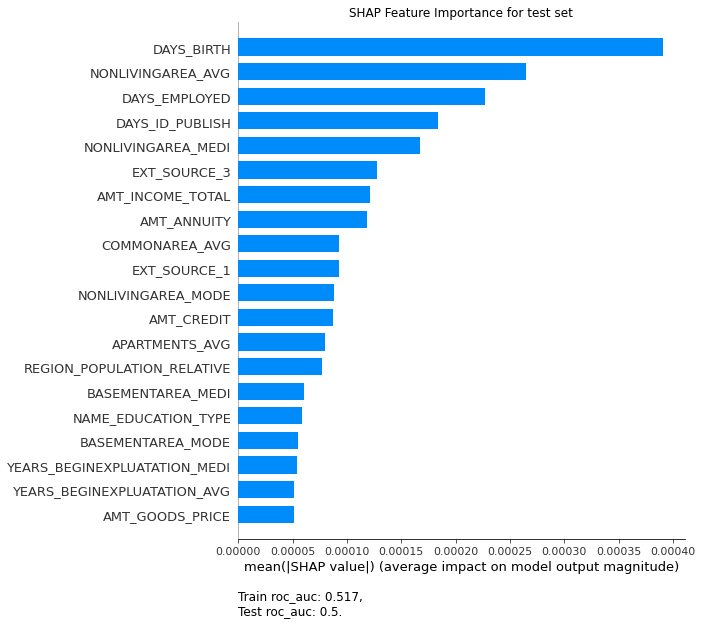

In [36]:
ax = shap_interpreter.plot('importance')


## Graphs global importance

Random forest / decision tree surrogate

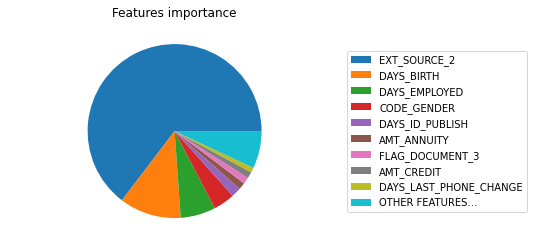

In [113]:
import matplotlib.pyplot as plt
import seaborn as sns
# sns.set()

# initialization
sum_val = 0
labels = []
frequencies = []

# get the labels and frequencies of 10 most important features
for col, val in sorted(zip(data_train_original.columns, sur_dt.feature_importances_,), key=lambda x: x[1], reverse=True,)[:9]:
    labels.append(col)
    frequencies.append(val)
    sum_val += val

# complete the data with other features
labels.append("OTHER FEATURES…")
frequencies.append(1 - sum_val)

fig, ax = plt.subplots()
ax.axis("equal")
ax.pie(frequencies,
        # autopct="%1.1f pourcents",
      )
plt.title("Features importance")
plt.legend(
    labels,
    loc='center left',
    bbox_to_anchor=(1, 0.5),
)
plt.show()
fig.savefig('plots/FI.png')

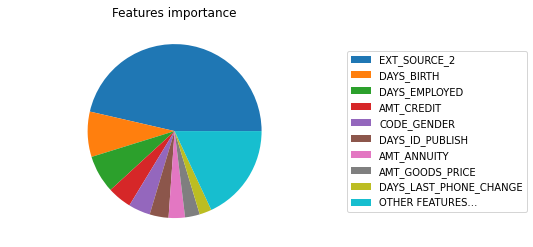

In [114]:
import matplotlib.pyplot as plt
import seaborn as sns
# sns.set()

# initialization
sum_val = 0
labels = []
frequencies = []

# get the labels and frequencies of 10 most important features
for col, val in sorted(zip(data_train_original.columns, sur_dt_lgbm.feature_importances_,), key=lambda x: x[1], reverse=True,)[:9]:
    labels.append(col)
    frequencies.append(val)
    sum_val += val

# complete the data with other features
labels.append("OTHER FEATURES…")
frequencies.append(1 - sum_val)

fig, ax = plt.subplots()
ax.axis("equal")
ax.pie(frequencies,
        # autopct="%1.1f pourcents",
      )
plt.title("Features importance")
plt.legend(
    labels,
    loc='center left',
    bbox_to_anchor=(1, 0.5),
)
plt.show()
fig.savefig('plots/FI_lgbm.png')

# Description of variables

In [115]:
# Loading the file with descriptions
features_descriptions = pd.read_csv('data_p7/Input/HomeCredit_columns_description.csv', encoding='iso-8859-1')
features_descriptions.head(10)

,Unnamed: 0,Table,Row,Description,Special
0,1,application_{train|test}.csv,SK_ID_CURR,ID of loan in our sample,NaN
1,2,application_{train|test}.csv,TARGET,Target variable (1 - client with payment diffi...,NaN
2,5,application_{train|test}.csv,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
3,6,application_{train|test}.csv,CODE_GENDER,Gender of the client,NaN
4,7,application_{train|test}.csv,FLAG_OWN_CAR,Flag if the client owns a car,NaN
5,8,application_{train|test}.csv,FLAG_OWN_REALTY,Flag if client owns a house or flat,NaN
6,9,application_{train|test}.csv,CNT_CHILDREN,Number of children the client has,NaN
7,10,application_{train|test}.csv,AMT_INCOME_TOTAL,Income of the client,NaN
8,11,application_{train|test}.csv,AMT_CREDIT,Credit amount of the loan,NaN
9,12,application_{train|test}.csv,AMT_ANNUITY,Loan annuity,NaN


In [116]:
features_descriptions_best_global = features_descriptions[features_descriptions['Row'].isin([
       'EXT_SOURCE_2','DAYS_BIRTH','AMT_CREDIT ','AMT_ANNUITY','NAME_EDUCATION_TYPE','CODE_GENDER'
    ,'DAYS_LAST_PHONE_CHANGE','FLAG_DOCUMENT_3','DAYS_ID_PUBLISH','DAYS_REGISTRATION'
])]

In [117]:
features_descriptions_best_global

,Unnamed: 0,Table,Row,Description,Special
3,6,application_{train|test}.csv,CODE_GENDER,Gender of the client,NaN
9,12,application_{train|test}.csv,AMT_ANNUITY,Loan annuity,NaN
13,16,application_{train|test}.csv,NAME_EDUCATION_TYPE,Level of highest education the client achieved,NaN
17,20,application_{train|test}.csv,DAYS_BIRTH,Client's age in days at the time of application,time only relative to the application
19,22,application_{train|test}.csv,DAYS_REGISTRATION,How many days before the application did clien...,time only relative to the application
20,23,application_{train|test}.csv,DAYS_ID_PUBLISH,How many days before the application did clien...,time only relative to the application
42,45,application_{train|test}.csv,EXT_SOURCE_2,Normalized score from external data source,normalized
95,98,application_{train|test}.csv,DAYS_LAST_PHONE_CHANGE,How many days before application did client ch...,NaN
97,100,application_{train|test}.csv,FLAG_DOCUMENT_3,Did client provide document 3,NaN
138,141,bureau.csv,AMT_ANNUITY,Annuity of the Credit Bureau credit,NaN


In [118]:
features_descriptions_best_local = features_descriptions[features_descriptions['Row'].isin([
       'EXT_SOURCE_2','DAYS_BIRTH','DEF_30_CNT_SOCIAL_CIRCLE',
    'CODE_GENDER','FLAG_DOCUMENT_3','NAME_EDUCATION_TYPE','OBS_30_CNT_SOCIAL_CIRCLE','FLAG_WORK_PHONE',
    'OWN_CAR_AGE','DAYS_ID_PUBLISH','FLAG_EMAIL','CNT_FAM_MEMBERS','AMT_CREDIT','COMMONAREA_MODE','LIVINGAREA_AVG'
])]

In [119]:
features_descriptions_best_local

,Unnamed: 0,Table,Row,Description,Special
3,6,application_{train|test}.csv,CODE_GENDER,Gender of the client,NaN
8,11,application_{train|test}.csv,AMT_CREDIT,Credit amount of the loan,NaN
13,16,application_{train|test}.csv,NAME_EDUCATION_TYPE,Level of highest education the client achieved,NaN
17,20,application_{train|test}.csv,DAYS_BIRTH,Client's age in days at the time of application,time only relative to the application
20,23,application_{train|test}.csv,DAYS_ID_PUBLISH,How many days before the application did clien...,time only relative to the application
21,24,application_{train|test}.csv,OWN_CAR_AGE,Age of client's car,NaN
24,27,application_{train|test}.csv,FLAG_WORK_PHONE,"Did client provide home phone (1=YES, 0=NO)",NaN
27,30,application_{train|test}.csv,FLAG_EMAIL,"Did client provide email (1=YES, 0=NO)",NaN
29,32,application_{train|test}.csv,CNT_FAM_MEMBERS,How many family members does client have,NaN
42,45,application_{train|test}.csv,EXT_SOURCE_2,Normalized score from external data source,normalized


In [120]:
# filtering features from 'application_train' table
mask = features_descriptions['Table'] == 'application_{train|test}.csv'
features_descriptions = features_descriptions[mask]

# setting the name of the feature as index
features_descriptions = features_descriptions.set_index('Row')

# keeping only description
features_descriptions = features_descriptions['Description']

# display result
features_descriptions.head()

Row
SK_ID_CURR                                     ID of loan in our sample
TARGET                Target variable (1 - client with payment diffi...
NAME_CONTRACT_TYPE          Identification if loan is cash or revolving
CODE_GENDER                                        Gender of the client
FLAG_OWN_CAR                              Flag if the client owns a car
Name: Description, dtype: object

In [121]:
# Checking the result
for column in data_train_original.columns[:5]:
    print(column, features_descriptions[column])

NAME_CONTRACT_TYPE Identification if loan is cash or revolving
CODE_GENDER Gender of the client
FLAG_OWN_CAR Flag if the client owns a car
FLAG_OWN_REALTY Flag if client owns a house or flat
CNT_CHILDREN Number of children the client has


In [122]:
# Save the data for web app
features_descriptions.to_csv('web/data/features_descriptions.csv', header='description')

In [123]:
features_descriptions

Row
SK_ID_CURR                                             ID of loan in our sample
TARGET                        Target variable (1 - client with payment diffi...
NAME_CONTRACT_TYPE                  Identification if loan is cash or revolving
CODE_GENDER                                                Gender of the client
FLAG_OWN_CAR                                      Flag if the client owns a car
                                                    ...                        
AMT_REQ_CREDIT_BUREAU_DAY     Number of enquiries to Credit Bureau about the...
AMT_REQ_CREDIT_BUREAU_WEEK    Number of enquiries to Credit Bureau about the...
AMT_REQ_CREDIT_BUREAU_MON     Number of enquiries to Credit Bureau about the...
AMT_REQ_CREDIT_BUREAU_QRT     Number of enquiries to Credit Bureau about the...
AMT_REQ_CREDIT_BUREAU_YEAR    Number of enquiries to Credit Bureau about the...
Name: Description, Length: 122, dtype: object